In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

## Outlier detection using percentile

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
max_thresh = df.price.quantile(0.999)

In [6]:
min_thresh = df.price.quantile(0.001)

### Show slected outlier

In [9]:
df_outlier = df[(df['price']<min_thresh) | (df['price']>max_thresh)]
df_outlier.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.00
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.00
7482,Super built-up Area,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.00
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
171,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
8653,Plot Area,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
5410,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00


In [10]:
df_no_outlier = df[(df['price']<max_thresh) & (df['price']>min_thresh)]

In [36]:
# 29 outliers are removed
df.shape[0]-df_no_outlier.shape[0]

29

### Remove Outlier using 4 standard_deviations

In [12]:
df_no_outlier.describe()

,bath,balcony,price
count,13219.000000,12688.000000,13291.000000
mean,2.690673,1.584253,110.010361
std,1.335757,0.817169,125.434347
min,1.000000,0.000000,11.500000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,1950.000000


In [16]:
print("Standard deviation after 1st step {}".format(df_no_outlier.price.std()))

Standard deviation after 1st step 125.43434724473576


# we want to remove 4 std outliers
- std Defination : std tells how much far data is from mean?

In [19]:
max_limit = df_no_outlier.price.mean() + 4*df_no_outlier.price.std()
max_limit

611.7477497493892

In [20]:
min_limit = df_no_outlier.price.mean() - 4*df_no_outlier.price.std()
min_limit

-391.7270282084969

### plot histogram and curve

In [23]:
import matplotlib.pyplot as plt

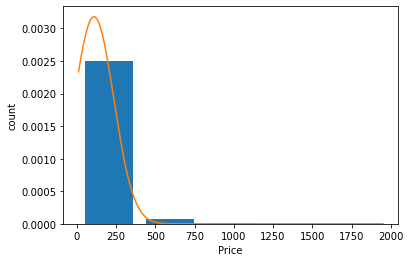

In [38]:
from scipy.stats import norm
plt.hist(df_no_outlier.price,bins=5,rwidth=0.80,density=True)
plt.xlabel('Price')
plt.ylabel('count')

range = np.arange(df_no_outlier.price.min(),df_no_outlier.price.max())
plt.plot(range,norm.pdf(range,df_no_outlier.price.mean(),df_no_outlier.price.std()))

In [39]:
df_no_outlier_4th_std =df_no_outlier[(df_no_outlier['price']>min_limit) & (df_no_outlier['price']<max_limit)]

In [40]:
df_no_outlier_4th_std

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [41]:
df.shape[0]-df_no_outlier_4th_std.shape[0]

176

### Using Z_score, Outliers Removal

In [43]:
df_no_outlier['Z_Score'] = (df_no_outlier.price - df_no_outlier.price.mean())/df_no_outlier.price.std()


<ipython-input-43-094a81acc42a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['Z_Score'] = (df_no_outlier.price - df_no_outlier.price.mean())/df_no_outlier.price.std()


In [44]:
df_no_outlier

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Z_Score
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.565558
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.079640
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.382753
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.119667
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.470448
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,0.964565
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,2.311884
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,-0.398698
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,3.013446


## Z_Score = [(x-mean)/std]

In [45]:
df_no_outlier_zscore = df_no_outlier[(df_no_outlier['Z_Score']<4.0) & (df_no_outlier['Z_Score']>-4.0)]

In [46]:
df.shape[0] - df_no_outlier_zscore.shape[0]

176